# 💔Listen to Your Heart: A Failure Detection🔮

# <div class="header1">1. | Introduction 👋</div>
<center>

# Context

<img src="https://media.giphy.com/media/8cBhJBU2wlq6H6qY4W/giphy.gif">

**Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease**

**People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help**





# 📌 Notebook Objectives


<center>
    <img src="https://fldscc.com/wp-content/uploads/2020/07/shutterstock_30528475.jpg" alt="Heart Failure Prediction" width="25%">
</center>

**This notebook aims to:**
- Perform dataset exploration using various types of data visualization.
- Perform Data Preprocessing, Data Analysis, Label Encoding, Feature Engineering and Feature Selection.
- Perform Splitting of the dataset and save separate datasets files for training and testing.
- Build a machine learning model that can predict patients status.
- Export prediction results on test data and save it in csv format.
- Perform predictions on new example data given and export the prediction result.



# Importing Libraries 📚


In [2]:
# Loading, Preprocessing, Analysis Libraries
import numpy as np
import pandas as pd

# Visulaiztion Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Model Training And Testing libraries
from sklearn.model_selection import train_test_split

# Models....
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, confusion_matrix, accuracy_score, classification_report, f1_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold

# Best Features Selection For Each Category Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2



# Reading & Loading The Dataset 👓

**This dataset is created manually. This dataset is created to predict whether a patient has heart failure or not. This dataset contains cardiatic information on patients and the diagnosis results of whether the patient has heart failure.**

Machine learning models are necessary to determine whether a patient has heart disease and speed up the diagnostic process based on the medical information provided about that patient. The variables that most influence a patient to have heart disease will also be explored more deeply in this notebook.


In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_excel('/content/Heart Data (2).xlsx')


## 🧾 **Dataset Description**

The dataset includes the following features:

- **Age:** Patient's age (in years)
- **Sex:** Gender of the patient (0 = male, 1 = female)
- **Chest Pain Type (cp):**
  - 0 = Typical Angina
  - 1 = Atypical Angina
  - 2 = Non-Anginal Pain
  - 3 = Asymptomatic
- **Resting Blood Pressure (trestbps):** Resting blood pressure (in mm Hg)
- **Serum Cholesterol (chol):** Serum cholestoral (in mg/dl)
- **Fasting Blood Sugar (fbs):**
  - 0 = Fasting blood sugar <= 120 mg/dl
  - 1 = Fasting blood sugar > 120 mg/dl
- **Resting Electrocardiographic Results (restecg):**
  - 0 = Normal
  - 1 = Having ST-T wave abnormality
  - 2 = Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **Maximum Heart Rate Achieved (MaxHR):** Maximum heart rate achieved
- **Exercise Angina :**
  - 0 = No
  - 1 = Yes
- **ST Depression Induced by Exercise Relative to Rest (oldpeak):**
- **The Slope of the Peak Exercise ST Segment (slope):**
  - 0 = Upsloping
  - 1 = Flat
  - 2 = Downsloping
  - **Diabetes (diabetes):**
  - 0 = No
  - 1 = Yes
- **Smoking (smoking):**
  - 0 = No
  - 1 = Yes
- **Creatine Values (creatine):** Ranging from 0 to 2500
- **Number of Major Vessels Colored by Flourosopy (ca):** Value Ranging from 0 to 3
- **Thalassemia (thal):**
- **Heart Failed:**
  - 0 = No Heart Failure
  - 1 = Heart Failure

### Print first 5 rows of the dataset

In [4]:
# print first 5 rows of the dataset
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Exercise Agina,Oldpeak,ST_Slope,ca,smoking,Creatine,Diabetes,thal,HeartFailed
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,2,0,168,0,3,Y
1,49,F,NAP,160,180,1,Normal,156,N,1.0,Flat,0,0,155,1,3,Y
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,125,1,3,Y
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,161,0,3,Y
4,54,M,NAP,150,195,1,Normal,122,N,0.0,Up,3,0,106,0,2,Y


### Print last 5 rows of the dataset

In [5]:
# print last 5 rows of the dataset
heart_data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Exercise Agina,Oldpeak,ST_Slope,ca,smoking,Creatine,Diabetes,thal,HeartFailed
1395,53,F,ASY,130,130,1,ST,120,Y,2.0,Flat,3,1,120,1,1,Y
1396,38,M,ASY,138,138,0,LVH,139,Y,2.5,Up,3,1,139,1,1,Y
1397,53,F,ATA,117,117,0,Normal,108,Y,2.0,Flat,0,1,108,1,1,Y
1398,62,M,ATA,121,121,0,Normal,148,Y,2.5,Up,2,1,148,1,1,Y
1399,50,M,TA,193,179,1,LVH,92,N,0.4,Flat,0,1,92,1,1,N


### Number of rows and columns in the dataset

In [6]:
print("The shape of the dataset is : ")
heart_data.shape

The shape of the dataset is : 


(1400, 17)

### Getting some info about the data

In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1400 non-null   int64  
 1   Sex             1400 non-null   object 
 2   ChestPainType   1400 non-null   object 
 3   RestingBP       1400 non-null   int64  
 4   Cholesterol     1400 non-null   int64  
 5   FastingBS       1400 non-null   int64  
 6   RestingECG      1400 non-null   object 
 7   MaxHR           1400 non-null   int64  
 8   Exercise Agina  1400 non-null   object 
 9   Oldpeak         1400 non-null   float64
 10  ST_Slope        1400 non-null   object 
 11  ca              1400 non-null   int64  
 12  smoking         1400 non-null   int64  
 13  Creatine        1400 non-null   int64  
 14  Diabetes        1400 non-null   int64  
 15  thal            1400 non-null   int64  
 16  HeartFailed     1400 non-null   object 
dtypes: float64(1), int64(10), object(

### Number of Values in Sex Column

In [8]:
heart_data['Sex'].value_counts().reset_index()

,Sex,count
0,M,856
1,F,544


### Number of Values in Target["HeartFailed"] Column

In [9]:
heart_data['HeartFailed'].value_counts().reset_index()

,HeartFailed,count
0,Y,700
1,N,700


### Number of Values in ChestPainType Column

In [10]:
heart_data['ChestPainType'].value_counts().reset_index()

,ChestPainType,count
0,ASY,760
1,NAP,290
2,ATA,287
3,TA,63


### Number of Values in Smoking Column

In [11]:
heart_data["smoking"].value_counts().reset_index()

,smoking,count
0,0,854
1,1,546


### Number of Values in Exercise Agina Column

In [12]:
heart_data['Exercise Agina'].value_counts().reset_index()

,Exercise Agina,count
0,N,815
1,Y,585


## 3.2.| Separating continuous and categorical variables

In [13]:
continuous_values = []
categorical_values = []

for column in heart_data.columns:
    if heart_data[column].dtype == 'int64' or heart_data[column].dtype == 'float64':
        continuous_values.append(column)
    else:
        categorical_values.append(column)

In [14]:
categorical_values

['Sex',
 'ChestPainType',
 'RestingECG',
 'Exercise Agina',
 'ST_Slope',
 'HeartFailed']

In [15]:
continuous_values

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ca',
 'smoking',
 'Creatine',
 'Diabetes',
 'thal']

# 3.3.| Visualization 📈

## 3.3.1.| Visualizing the continuous values

### 3.3.1.1| Visualizing the continuous values [Way 1] = Histogram

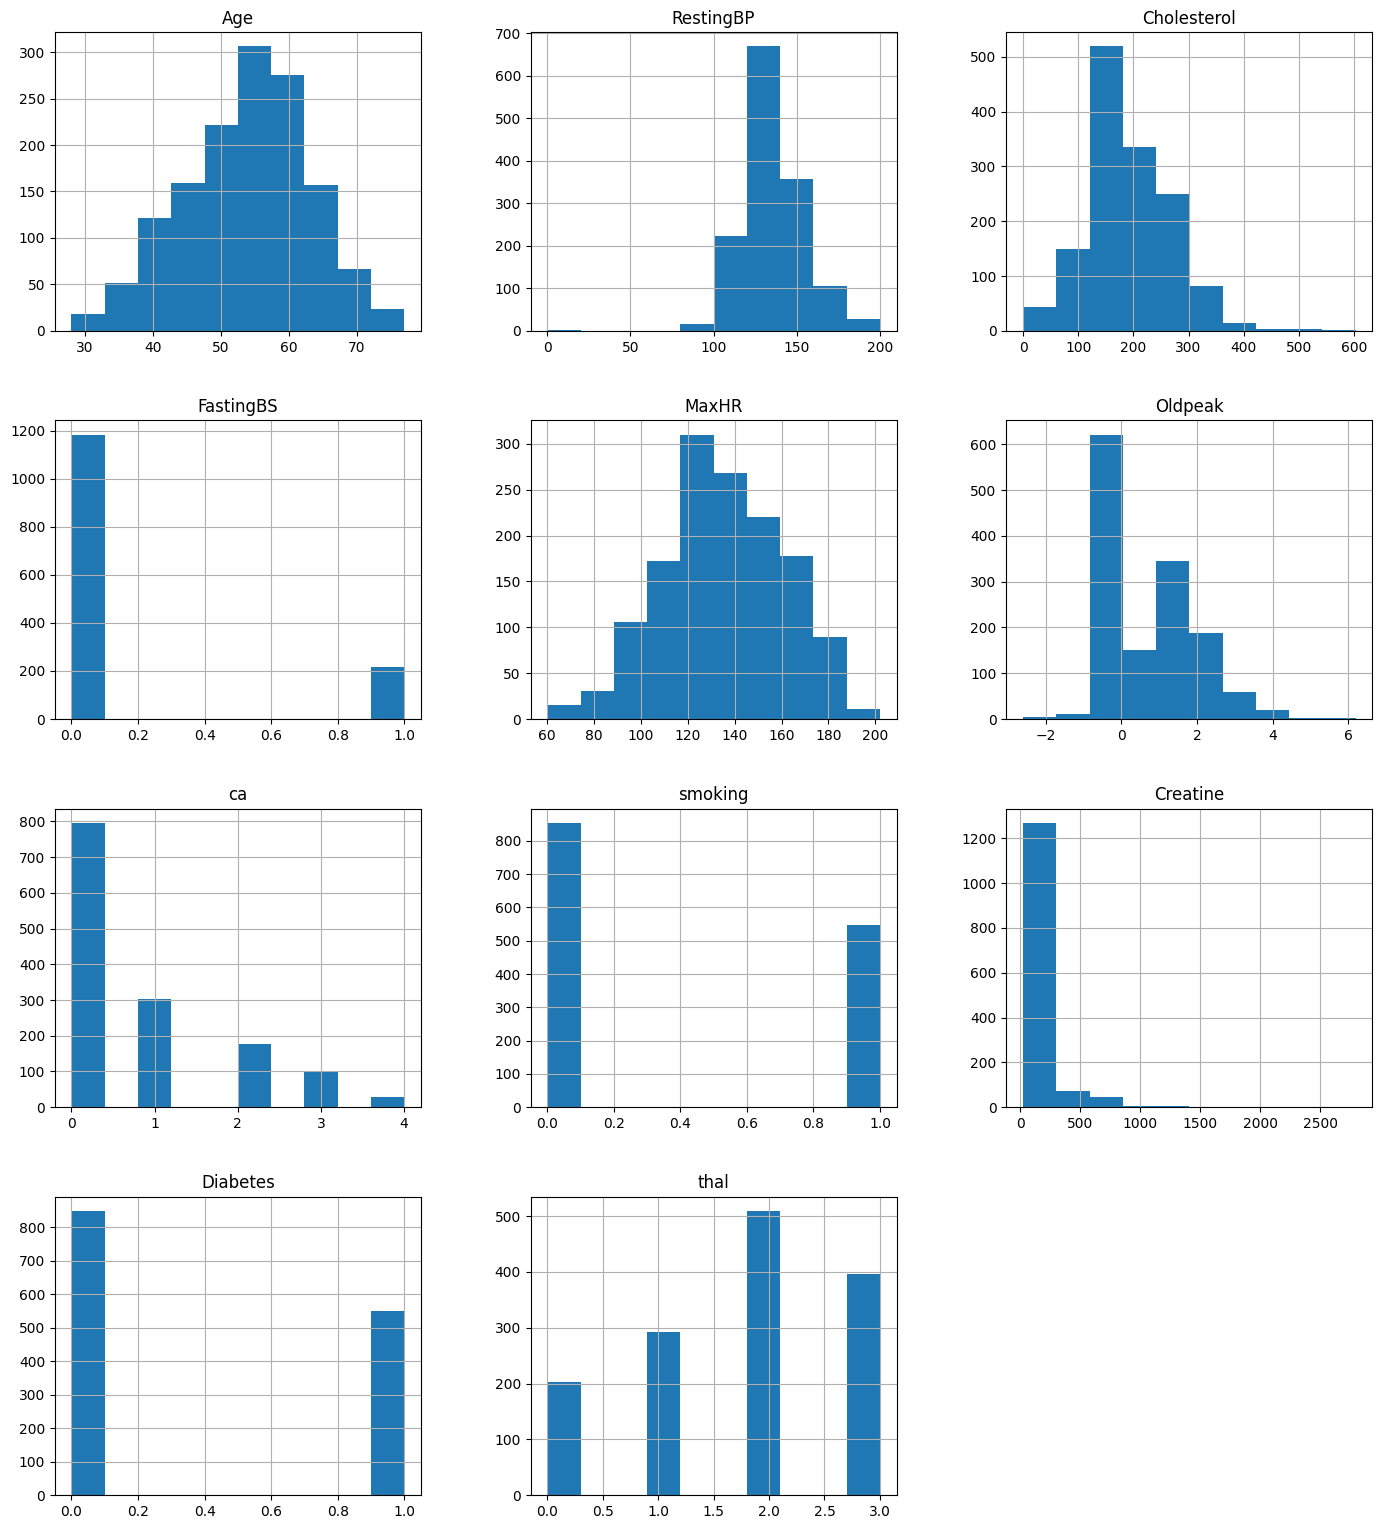

In [16]:
heart_data.hist(continuous_values, figsize=(17, 19))
plt.show()

## 3.3.4. | Visualizing Attributes Vs Target ["Heart Failed"] Attribute & other Attributes

### 3.3.4.1. | Visualizing "Sex" Attribute Vs "Heart Failed"

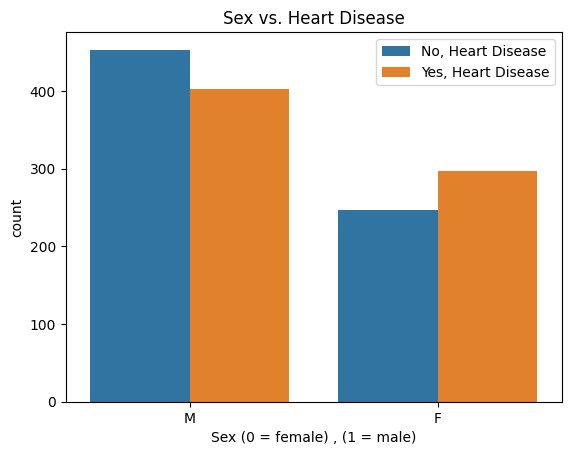

In [17]:
sns.countplot(x='Sex', hue='HeartFailed', data=heart_data)
plt.xlabel('Sex (0 = female) , (1 = male)')
plt.legend(labels=['No, Heart Disease', 'Yes, Heart Disease'])
plt.title('Sex vs. Heart Disease')
plt.show()

### 3.3.4.2. | Visualizing "ChestPainType" Attribute Vs "Sex"

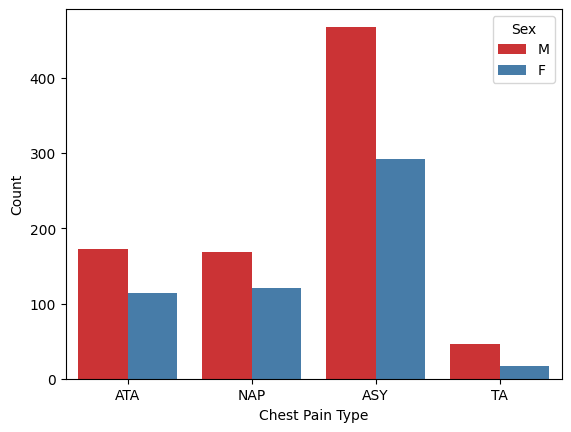

In [18]:
sns.countplot(x="ChestPainType", hue="Sex", data=heart_data, palette="Set1")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

### 3.3.4.3. | Visualizing "ChestPainType" Attribute Vs "Heart Failed" By Countplot

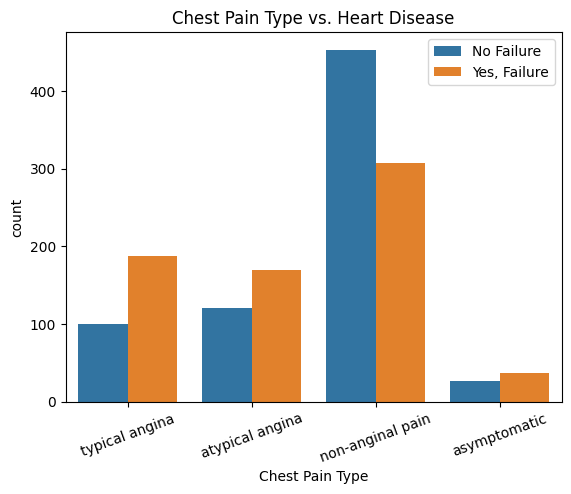

In [19]:
sns.countplot(x="ChestPainType", hue="HeartFailed", data=heart_data)
plt.xticks([0,1,2,3], ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"])
plt.xticks(rotation=20)
plt.title("Chest Pain Type vs. Heart Disease")
plt.xlabel("Chest Pain Type")
plt.legend(labels=["No Failure", "Yes, Failure"])
plt.show()

### 3.3.4.4. | Visualizing "FastingBS" Attribute Vs "Heart Failed"

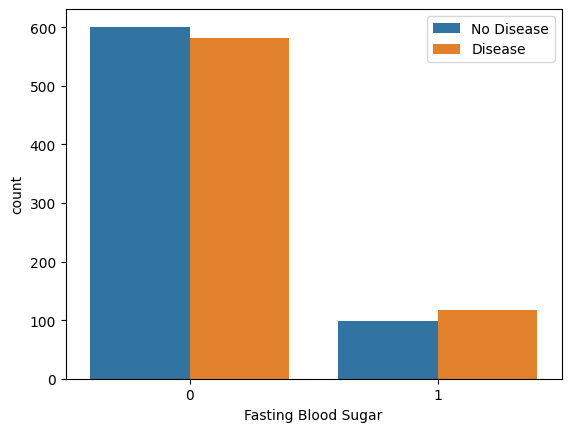

In [20]:
sns.countplot(x="FastingBS", hue="HeartFailed", data=heart_data)
plt.legend(labels=["No Disease", "Disease"])
plt.xlabel("Fasting Blood Sugar")
plt.show()

### 3.3.4.7. | Visualizing "Age" Attribute Vs "Heart Failed"

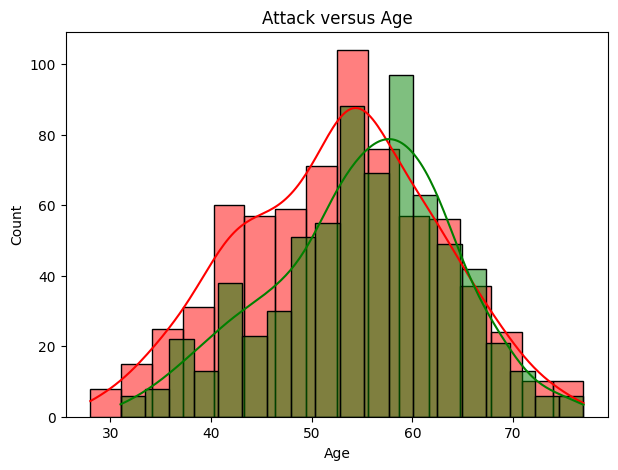

In [77]:
plt.figure(figsize=(7,5))
sns.histplot(heart_data[heart_data['HeartFailed'] == "N"]["Age"], color='red',kde=True)
sns.histplot(heart_data[heart_data['HeartFailed'] == "Y"]["Age"], color='green',kde=True)
plt.title('Attack versus Age')
plt.show()

### 3.3.4.8. | Visualizing "ChestPainType" Attribute Vs "Heart Failed" By Histplot

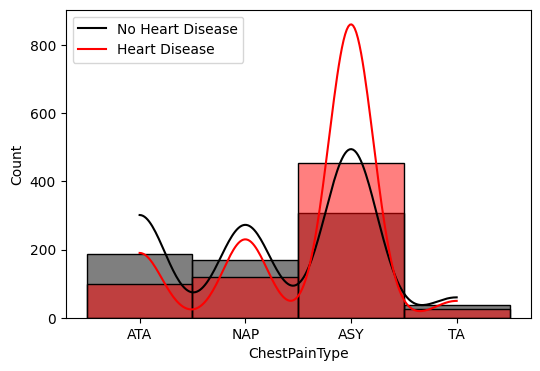

In [78]:
plt.figure(figsize=(6,4))
colors = ['green', 'black', 'red', 'orange', 'purple']

# Plot the histplots
sns.histplot(heart_data[heart_data['HeartFailed'] == "N"]["ChestPainType"], color=colors[1],kde=True)
sns.histplot(heart_data[heart_data['HeartFailed'] == "Y"]["ChestPainType"], color=colors[2],kde=True)

# Add the legend
plt.legend(['No Heart Disease', 'Heart Disease'])

# Show the plot
plt.show()

### 3.3.4.9. | Visualizing "Smoking" Attribute Vs "Heart Failed"

<ipython-input-25-76ada97dab13>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x="smoking", hue="HeartFailed", data=heart_data, palette=colors)


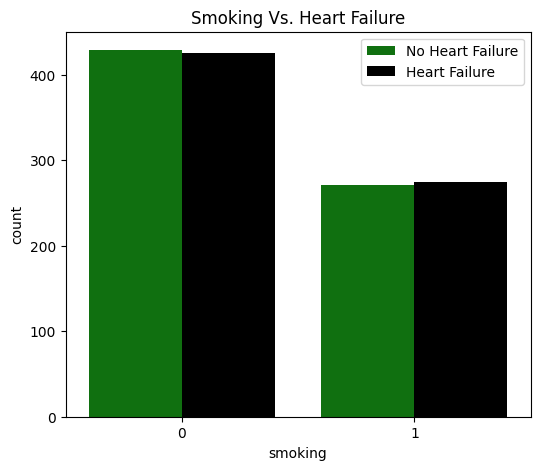

In [25]:
plt.figure(figsize=(6,5))
colors = ['green', 'black', 'red', 'orange', 'purple']

sns.countplot(x="smoking", hue="HeartFailed", data=heart_data, palette=colors)

# Add the legend
plt.legend(['No Heart Failure', 'Heart Failure'])
plt.title('Smoking Vs. Heart Failure')

# Show the plot
plt.show()

## 3.3.5. | Visualizing "HeartFailed" Attribute

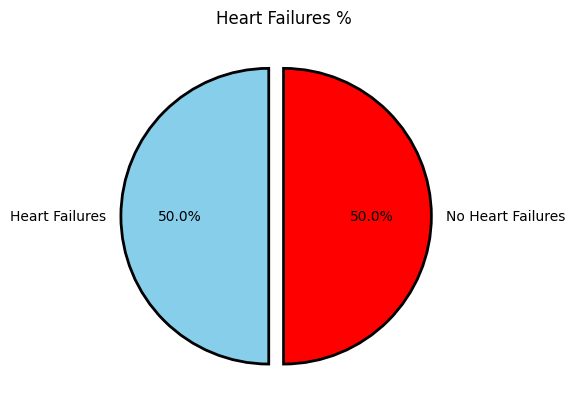

In [98]:
colors = ['skyblue', 'red']
l = list(heart_data['HeartFailed'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

# Pie chart
plt.pie(circle, labels=['Heart Failures', 'No Heart Failures'], autopct='%1.1f%%', startangle=90,
        explode=(0.1, 0), colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'antialiased': True})
plt.title('Heart Failures %')


plt.show()

# 4.| Data Preprocessing ⚙️
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.
​
The concepts that I will cover in this article are
1. Handling Null Values
2. Handling Duplicate Values
3. Finding Unique Values
4. Handling Categorical Variables
5. Correlation Matrix
6. Feature Scaling
7. Finding Best Features


## 4.0 | Statistics of Data


In [28]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ca,smoking,Creatine,Diabetes,thal
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,53.837857,132.631429,190.287143,0.155000,135.352143,0.821500,0.756429,0.390000,185.300000,0.393571,1.785000
std,9.408838,18.048814,77.465409,0.362034,25.484209,1.037331,1.045068,0.487924,180.872617,0.488716,1.011826
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,23.000000,0.000000,0.000000
25%,47.750000,120.000000,134.000000,0.000000,118.000000,0.000000,0.000000,0.000000,124.000000,0.000000,1.000000
50%,54.500000,130.000000,178.500000,0.000000,136.000000,0.400000,0.000000,0.000000,147.000000,0.000000,2.000000
75%,61.000000,140.000000,243.000000,0.000000,154.000000,1.500000,1.000000,1.000000,170.000000,1.000000,3.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,4.000000,1.000000,2794.000000,1.000000,3.000000


## 4.1.| Handling Null Values

In [101]:
# checking for missing values
print("Missing values: \n")
heart_data.isnull().sum()

Missing values: 



Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
Exercise Agina    0
Oldpeak           0
ST_Slope          0
ca                0
smoking           0
Creatine          0
Diabetes          0
thal              0
HeartFailed       0
dtype: int64

## 4.2.| Handling Duplicate Values

In [30]:
data_dup = heart_data.duplicated().any()
print(data_dup)

False


In [31]:
heart_data = heart_data.drop_duplicates()
print("After removing duplicates: \n")
heart_data.shape

After removing duplicates: 



(1400, 17)

## 4.3.| Finding Unique Values

In [103]:
dict = {}
for i in list(heart_data.columns):
    dict[i] = heart_data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Age,50
Sex,2
ChestPainType,4
RestingBP,69
Cholesterol,266
FastingBS,2
RestingECG,3
MaxHR,120
Exercise Agina,2
Oldpeak,53


## 4.4.| Handling Categorical Variables

In [33]:
categorical_values

['Sex',
 'ChestPainType',
 'RestingECG',
 'Exercise Agina',
 'ST_Slope',
 'HeartFailed']

In [34]:
le = LabelEncoder()
df1 = heart_data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['Exercise Agina'] = le.fit_transform(df1['Exercise Agina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])
df1['HeartFailed'] = le.fit_transform(df1['HeartFailed'])

### 4.4.0 | Storing Categorical Columns Value Into A Separate Excel File After Encoding

In [106]:
encoded_categorical_columns = df1[['Sex', 'ChestPainType', 'RestingECG', 'Exercise Agina', 'ST_Slope', 'HeartFailed']]

excel_path = r"C:\Users\acer\Downloads\PFAI Project\categorical_encoding.xlsx"

encoded_categorical_columns.to_excel(excel_path, index=False)

### 4.4.1. | Checking The Info After Label Encoding

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1400 non-null   int64  
 1   Sex             1400 non-null   int64  
 2   ChestPainType   1400 non-null   int64  
 3   RestingBP       1400 non-null   int64  
 4   Cholesterol     1400 non-null   int64  
 5   FastingBS       1400 non-null   int64  
 6   RestingECG      1400 non-null   int64  
 7   MaxHR           1400 non-null   int64  
 8   Exercise Agina  1400 non-null   int64  
 9   Oldpeak         1400 non-null   float64
 10  ST_Slope        1400 non-null   int64  
 11  ca              1400 non-null   int64  
 12  smoking         1400 non-null   int64  
 13  Creatine        1400 non-null   int64  
 14  Diabetes        1400 non-null   int64  
 15  thal            1400 non-null   int64  
 16  HeartFailed     1400 non-null   int64  
dtypes: float64(1), int64(16)
memory u

### 4.4.2. | Displaying First 15 And Last 10 Rows of Dataset After "Label Encoding"

In [37]:
df1.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Exercise Agina,Oldpeak,ST_Slope,ca,smoking,Creatine,Diabetes,thal,HeartFailed
0,40,1,1,140,289,0,1,172,0,0.0,2,2,0,168,0,3,1
1,49,0,2,160,180,1,1,156,0,1.0,1,0,0,155,1,3,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0,1,125,1,3,1
3,48,0,0,138,214,0,1,108,1,1.5,1,1,0,161,0,3,1
4,54,1,2,150,195,1,1,122,0,0.0,2,3,0,106,0,2,1
5,39,1,2,120,339,0,1,170,0,0.0,2,0,1,122,0,2,1
6,45,0,1,130,237,0,1,170,0,0.0,2,3,0,140,0,1,1
7,54,1,1,110,208,0,1,142,0,0.0,2,1,1,145,1,3,1
8,37,1,0,140,207,0,1,130,1,1.5,1,0,0,144,0,3,1
9,48,0,1,120,284,0,1,120,0,0.0,2,2,1,116,1,2,0


In [38]:
df1.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Exercise Agina,Oldpeak,ST_Slope,ca,smoking,Creatine,Diabetes,thal,HeartFailed
1390,56,0,0,164,164,0,1,106,1,1.7,1,3,1,106,1,1,1
1391,58,0,2,140,140,0,1,130,1,0.1,1,1,1,130,1,1,1
1392,55,0,1,110,110,1,0,140,0,0.0,1,0,1,140,1,1,0
1393,67,1,2,144,144,1,1,122,1,0.1,1,3,1,122,1,1,1
1394,46,1,3,130,130,0,1,130,1,2.0,1,0,1,130,1,1,1
1395,53,0,0,130,130,1,2,120,1,2.0,1,3,1,120,1,1,1
1396,38,1,0,138,138,0,0,139,1,2.5,2,3,1,139,1,1,1
1397,53,0,1,117,117,0,1,108,1,2.0,1,0,1,108,1,1,1
1398,62,1,1,121,121,0,1,148,1,2.5,2,2,1,148,1,1,1
1399,50,1,3,193,179,1,0,92,0,0.4,1,0,1,92,1,1,0


## 4.5.| Correlation Matrix
### Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

### 1. Correlation of Continuous Features

In [40]:
df_corr=heart_data[continuous_values].corr()
df_corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ca,smoking,Creatine,Diabetes,thal
Age,1.000000,0.187222,-0.071334,0.021653,-0.251494,0.142371,0.017135,0.005065,0.112963,-0.001812,-0.038278
RestingBP,0.187222,1.000000,0.138005,0.053381,-0.074368,0.096835,-0.004460,0.016253,0.032899,0.009002,0.019768
Cholesterol,-0.071334,0.138005,1.000000,-0.010789,0.155643,0.060347,-0.036740,-0.064086,0.089271,-0.056854,0.315564
FastingBS,0.021653,0.053381,-0.010789,1.000000,-0.027226,-0.032672,0.107413,0.009590,0.011581,0.054923,0.011035
MaxHR,-0.251494,-0.074368,0.155643,-0.027226,1.000000,-0.085468,0.000727,-0.061525,-0.005993,-0.063191,0.043660
Oldpeak,0.142371,0.096835,0.060347,-0.032672,-0.085468,1.000000,0.011560,0.023953,0.044719,0.011355,0.068832
ca,0.017135,-0.004460,-0.036740,0.107413,0.000727,0.011560,1.000000,0.025218,0.058569,0.084262,0.022094
smoking,0.005065,0.016253,-0.064086,0.009590,-0.061525,0.023953,0.025218,1.000000,-0.020709,0.324070,-0.009570
Creatine,0.112963,0.032899,0.089271,0.011581,-0.005993,0.044719,0.058569,-0.020709,1.000000,-0.071364,0.125868
Diabetes,-0.001812,0.009002,-0.056854,0.054923,-0.063191,0.011355,0.084262,0.324070,-0.071364,1.000000,0.054156


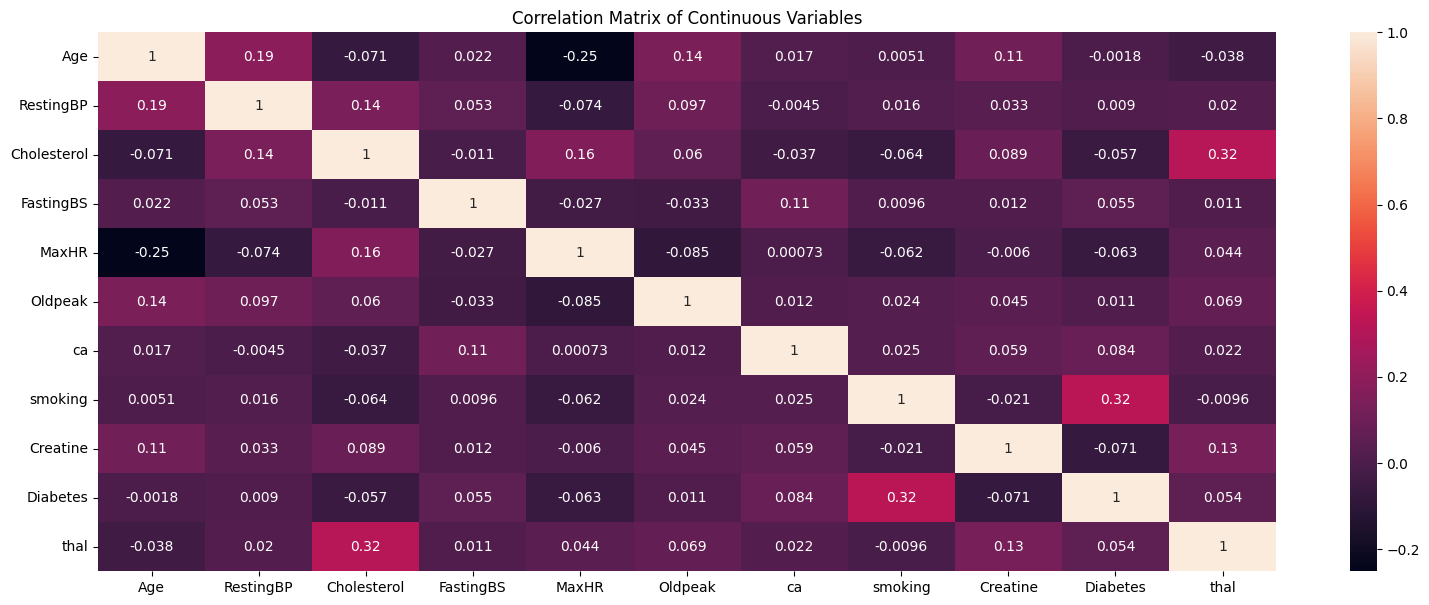

In [41]:
plt.figure(figsize=(19,7))
sns.heatmap(df_corr, annot = True)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

### 2. Correlation of All Features

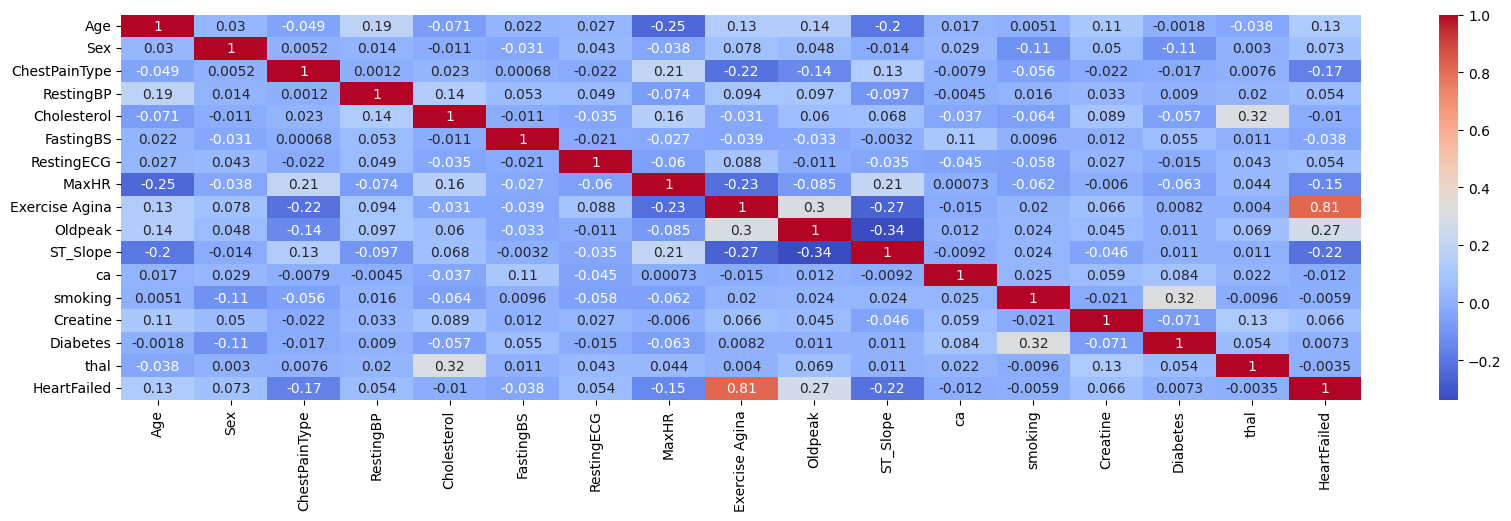

In [110]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm');

### 4.6.3. | Displaying First 10 And Last 10 Rows of Dataset After "Feature Scaling"

In [44]:
df1.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Exercise Agina,Oldpeak,ST_Slope,ca,smoking,Creatine,Diabetes,thal,HeartFailed
0,40,1,1,140,289,0,1,172,0,0.0,2,2,0,168,0,3,1
1,49,0,2,160,180,1,1,156,0,1.0,1,0,0,155,1,3,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0,1,125,1,3,1
3,48,0,0,138,214,0,1,108,1,1.5,1,1,0,161,0,3,1
4,54,1,2,150,195,1,1,122,0,0.0,2,3,0,106,0,2,1
5,39,1,2,120,339,0,1,170,0,0.0,2,0,1,122,0,2,1
6,45,0,1,130,237,0,1,170,0,0.0,2,3,0,140,0,1,1
7,54,1,1,110,208,0,1,142,0,0.0,2,1,1,145,1,3,1
8,37,1,0,140,207,0,1,130,1,1.5,1,0,0,144,0,3,1
9,48,0,1,120,284,0,1,120,0,0.0,2,2,1,116,1,2,0


In [45]:
df1.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Exercise Agina,Oldpeak,ST_Slope,ca,smoking,Creatine,Diabetes,thal,HeartFailed
1390,56,0,0,164,164,0,1,106,1,1.7,1,3,1,106,1,1,1
1391,58,0,2,140,140,0,1,130,1,0.1,1,1,1,130,1,1,1
1392,55,0,1,110,110,1,0,140,0,0.0,1,0,1,140,1,1,0
1393,67,1,2,144,144,1,1,122,1,0.1,1,3,1,122,1,1,1
1394,46,1,3,130,130,0,1,130,1,2.0,1,0,1,130,1,1,1
1395,53,0,0,130,130,1,2,120,1,2.0,1,3,1,120,1,1,1
1396,38,1,0,138,138,0,0,139,1,2.5,2,3,1,139,1,1,1
1397,53,0,1,117,117,0,1,108,1,2.0,1,0,1,108,1,1,1
1398,62,1,1,121,121,0,1,148,1,2.5,2,2,1,148,1,1,1
1399,50,1,3,193,179,1,0,92,0,0.4,1,0,1,92,1,1,0


# 4.7.| Feature Selection

## 1. Categorical Features Selection

SelectKBest(k='all', score_func=<function chi2 at 0x7d058a08f7f0>)
Selected Features:
Index(['Exercise Agina', 'ChestPainType', 'ST_Slope', 'Sex', 'RestingECG'], dtype='object')


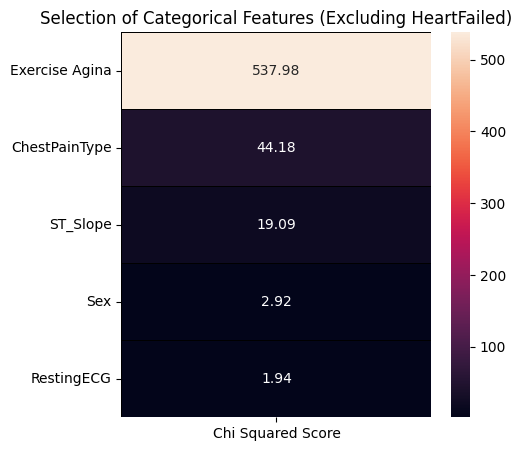

In [111]:
# Use all columns in categorical_values, excluding the target column
features = df1[categorical_values].drop(columns=['HeartFailed'])

X = features.iloc[:, :]
y = df1['HeartFailed']

# Applying SelectKBest with chi-squared test
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)
print(fit)
# Creating a DataFrame to store the chi-squared scores
featureScores = pd.DataFrame(data={'Chi Squared Score': fit.scores_}, index=X.columns)

selected_features = featureScores.sort_values(by='Chi Squared Score', ascending=False).index
print("Selected Features:")
print(selected_features)

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='Chi Squared Score', ascending=False), annot=True, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features (Excluding HeartFailed)')
plt.show()


## 4.7.2| Continuous Features Selection

Selected Features (Continuous):
Index(['thal', 'Creatine', 'Cholesterol', 'Diabetes', 'smoking', 'MaxHR',
       'Oldpeak', 'FastingBS', 'ca', 'Age', 'RestingBP'],
      dtype='object')


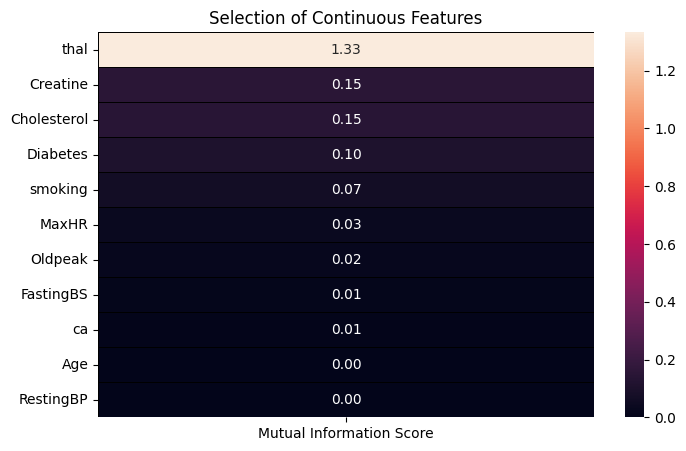

In [117]:
# Use all columns in continuous_values
continuous_features = df1[continuous_values]

# Separating features and target variable
X_continuous = continuous_features.iloc[:, :11]
y_continuous = continuous_features.iloc[:, -1]   # Assume the last column is 'HeartFailed'

# Applying mutual information
mutual_info_scores_continuous = mutual_info_classif(X_continuous, y_continuous, discrete_features=False)

# Creating a DataFrame to store the mutual information scores
featureScores_continuous = pd.DataFrame(data={'Mutual Information Score': mutual_info_scores_continuous}, index=X_continuous.columns)

# Displaying the selected features
selected_features_continuous = featureScores_continuous.sort_values(by='Mutual Information Score', ascending=False).index
print("Selected Features (Continuous):")
print(selected_features_continuous)

# Plotting the heatmap with a beautiful color palette
plt.subplots(figsize=(8, 5))
sns.heatmap(featureScores_continuous.sort_values(by='Mutual Information Score', ascending=False)[['Mutual Information Score']], annot=True, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Continuous Features')
plt.show()


# 5.| Data Separating and Splitting 🪓


### 5.1| Data Separating

In [125]:
selected_features = ['Exercise Agina', 'ChestPainType', 'thal', 'Cholesterol', 'Creatine']

# Extract the selected features from the DataFrame
features = df1[selected_features].values

target = df1['HeartFailed'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20)


### 5.2| Shape of Training and Testing Data

In [126]:
print("Training set features shape:", x_train.shape)
print("Testing set features shape:", x_test.shape)
print("Training set target shape:", y_train.shape)
print("Testing set target shape:", y_test.shape)


Training set features shape: (1120, 5)
Testing set features shape: (280, 5)
Training set target shape: (1120,)
Testing set target shape: (280,)


### 5.3| Saving Training and Testing Data

# 6.| Model Training & Implementation 🛠️
<img src="https://media.giphy.com/media/zMukICnMEZmSf8zvXd/giphy.gif">

## 6.1| Functions for Model , Its Evaluation and Displaying Its Plotting

In [66]:
def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    # Format confusion matrix values
    labels = [['{}\n{}'.format(name, value) for name, value in zip(names, row)] for row in cm]

    sns.heatmap(cm, annot=labels, fmt='', annot_kws={"size": 14})
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, classifier.predict(x_test)))

    # ROC Curve
    plot_roc_curve_custom(classifier, x_test, y_test)

def plot_roc_curve_custom(classifier, x_test, y_test):
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(x_test)[:, 1])

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

def model(classifier, x_train, y_train, x_test, y_test):
    # Select relevant features
    selected_features = ['Exercise Agina', 'ChestPainType', 'thal', 'Cholesterol', 'Creatine']

    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, prediction)
    cross_val_score_mean = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    roc_auc = roc_auc_score(y_test, prediction)

    print("Accuracy: {:.2%}".format(accuracy))
    print("Cross Validation Score: {:.2%}".format(cross_val_score_mean))
    print("ROC_AUC Score: {:.2%}".format(roc_auc))

    # Evaluation
    model_evaluation(classifier, x_test, y_test)


## 6.2|  Applying TREE BASED Machine Learning Models 💻

## 6.2.1.| Decision Tree Classifier

**Decision Tree** is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where **internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome**.

In a Decision tree, there are **two nodes**, which are the **Decision Node and Leaf Node**. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

![Decision Tree](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)



### 6.2.1.1. Model Training, Implementation & Plotting

In [51]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy: 83.93%
Cross Validation Score: 91.96%
ROC_AUC Score: 84.39%


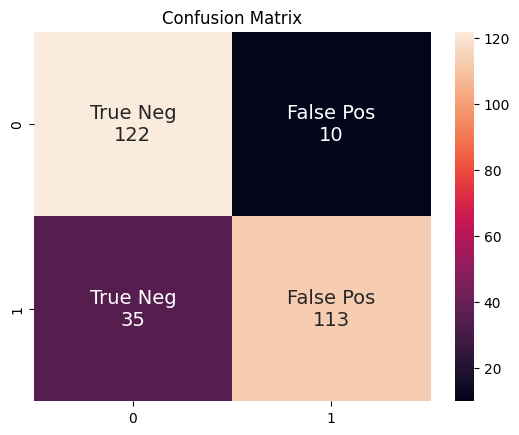


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       132
           1       0.92      0.76      0.83       148

    accuracy                           0.84       280
   macro avg       0.85      0.84      0.84       280
weighted avg       0.85      0.84      0.84       280



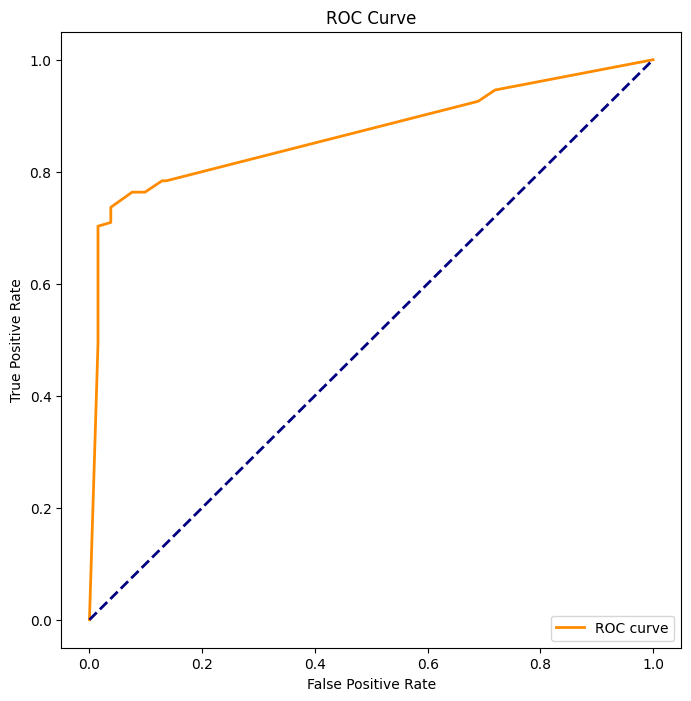

In [67]:
model(classifier_dt, x_train, y_train, x_test, y_test)

### 6.2.1.2. Model Evaluation & Confusion Matrix

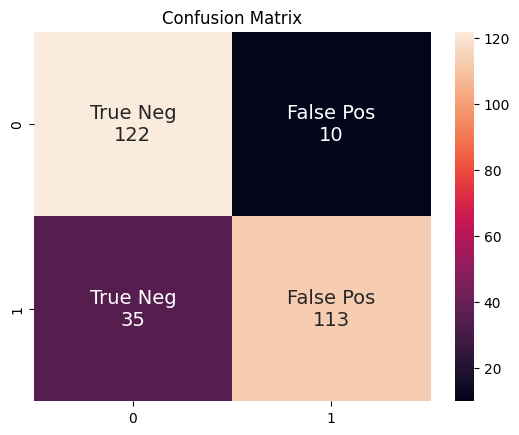


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       132
           1       0.92      0.76      0.83       148

    accuracy                           0.84       280
   macro avg       0.85      0.84      0.84       280
weighted avg       0.85      0.84      0.84       280



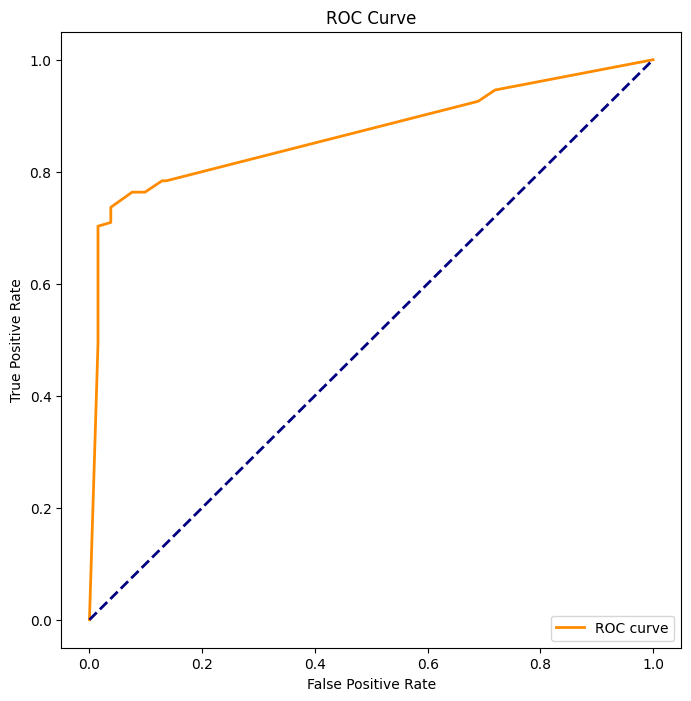

In [68]:
model_evaluation(classifier_dt, x_test, y_test)

## 6.2.2.| Random Forest



**Random Forest** is a tree-based machine learning algorithm that **leverages the power of multiple decision trees for making decisions**. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. **A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models**.

![Random Forest](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png)



### 6.2.2.2. Model Training, Implementation & Ploting

In [69]:
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train, columns=['Exercise Agina', 'Chest Pain Type', 'Thal', 'Cholesterol', 'Creatine'])
    x_test = pd.DataFrame(x_test, columns=['Exercise Agina', 'Chest Pain Type', 'Thal', 'Cholesterol', 'Creatine'])

# Select relevant features
selected_features = ['Exercise Agina', 'Chest Pain Type', 'Thal', 'Cholesterol', 'Creatine']

# Create subsets of x_train and x_test with selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

param_grid = {
    'max_depth': [4, 8, 12],
    'n_estimators': [50, 100, 200],
}

# Create a RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(classifier_rf, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data using the selected features
grid_search.fit(x_train_selected, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_classifier_rf = grid_search.best_estimator_

# Use the best model for predictions on the test set with selected features
y_pred = best_classifier_rf.predict(x_test_selected)


Best Parameters: {'max_depth': 4, 'n_estimators': 50}


Accuracy: 84.29%
Cross Validation Score: 92.31%
ROC_AUC Score: 84.93%


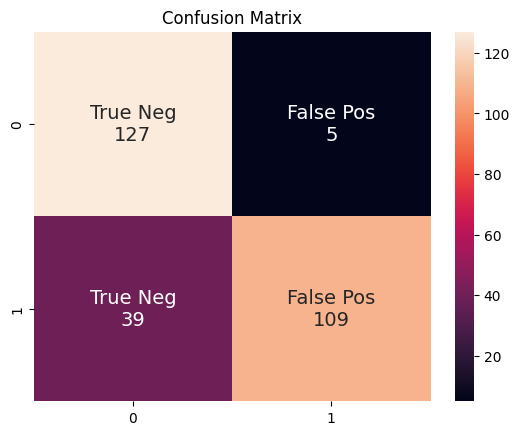


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       132
           1       0.96      0.74      0.83       148

    accuracy                           0.84       280
   macro avg       0.86      0.85      0.84       280
weighted avg       0.87      0.84      0.84       280



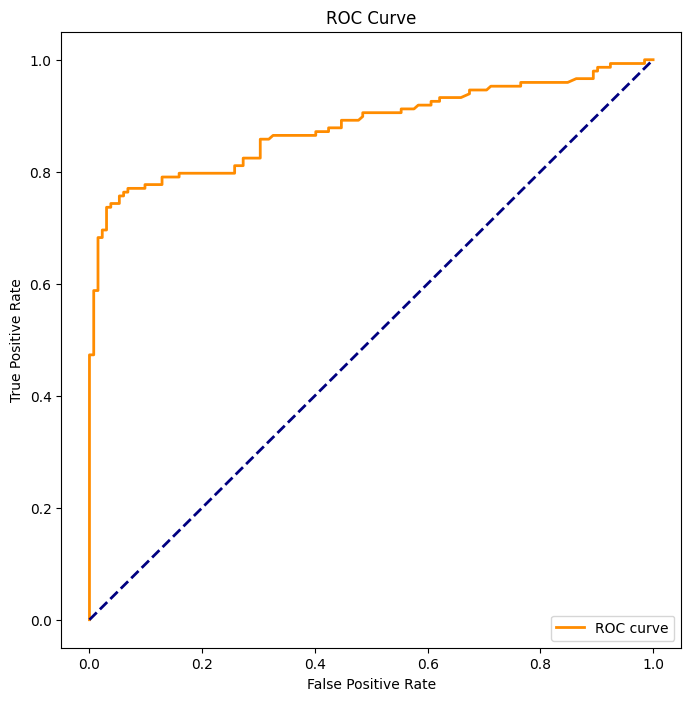

In [70]:
classifier_rf = RandomForestClassifier(max_depth=4, random_state=0, n_estimators=50)
model(classifier_rf, x_train, y_train, x_test, y_test)


# 7.| Prediction Case 🧐


## 7.2. | Model Prediction of First 10 Rows Using Random Forest Classifier

In [71]:
# Use the best model for predictions
y_pred_rf = best_classifier_rf.predict(x_test_selected)

# Create a new DataFrame with selected features and predictions for RandomForestClassifier
result_df_rf = pd.DataFrame({
    'Exercise Agina': x_test_selected['Exercise Agina'].values,
    'Chest Pain Type': x_test_selected['Chest Pain Type'].values,
    'Thal': x_test_selected['Thal'].values,
    'Cholesterol': x_test_selected['Cholesterol'].values,
    'Creatine': x_test_selected['Creatine'].values,
    'Original_HeartFailed': y_test,
    'Predicted_HeartFailed_RF': y_pred_rf
})

# Display the first ten rows of the new DataFrame for RandomForestClassifier
result_df_rf.head(10)


,Exercise Agina,Chest Pain Type,Thal,Cholesterol,Creatine,Original_HeartFailed,Predicted_HeartFailed_RF
0,1,3,1,120,145,1,1
1,0,1,3,215,138,0,0
2,0,0,1,128,120,0,0
3,1,0,3,207,582,1,1
4,1,2,1,108,180,1,1
5,0,1,1,160,121,0,0
6,1,0,1,140,155,1,1
7,0,0,2,248,158,0,0
8,0,2,2,240,115,0,0
9,0,0,3,412,145,0,0


# 9. | Model Prediction System By Giving Individuals Data 📤

### 9.3. | Comprison of Real Values Vs Predicted Values For Selected Individuals and Actual Heart Failed By Model Predicition System

| Index | Actual Values | Predicted Values |
|-------|---------------|-------------------|
|   0   |      Yes      |        No         |
|   1   |      No       |        No         |
|   2   |      Yes      |       Yes         |
|   3   |      No       |        No         |
|   4   |      Yes      |       Yes         |
|   5   |      Yes      |       Yes         |


**As, it has predicted 5 out of 6 individuals values right**


###  Result Analysis | 83.33% Accuracy.


# 10. | Conclusion 🧐

- This dataset is well-suited for understanding binary classification problems involving a combination of numerical and categorical features.

- Subject matter experts, such as doctors or nurses, can benefit from insights provided by the analysis, aiding them in making informed decisions.

- The analysis performed in this notebook is based on the dataset vreated

- Visualization plays a crucial role in conveying information and displaying the results of tests or outputs. It enhances understanding and interpretation.

- The Label Encoding was performed in this analysis.

- Feature engineering involves a sequence of processes. In this case, data scaling was performed before the feature selection test. The order of these processes may vary, but the results remain consistent.

- Hyperparameter tuning for modeling was also performed in this analysis. It is essential for improving the performance of the model.

- The models were trained, tested and evaluated

- The Predictions were made using the trained model

- The results of the predictions were compared to the actual values.

- An Prediction System was created to predict whether the patient has a Heart Disease or not.